In [2]:
# Basic Analysis
# Interaction Time, # Sessions, % Engagaed, Engagement by Session, Continuous Engagement

In [2]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [3]:
p5_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master Window/p5_master_window.csv'
p7_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master Window/p7_master_window.csv'
p9_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master Window/p9_master_window.csv'
p11_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master Window/p11_master_window.csv'
p12_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master Window/p12_master_window.csv'
p17_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master Window/p17_master_window.csv'
p18_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master Window/p18_master_window.csv'

data5 = pd.read_csv(p5_file)
data7 = pd.read_csv(p7_file)
data9 = pd.read_csv(p9_file)
data11 = pd.read_csv(p11_file)
data12 = pd.read_csv(p12_file)
data17 = pd.read_csv(p17_file)
data18 = pd.read_csv(p18_file)

In [4]:
data = [data5, data7, data9, data11, data12, data17, data18]
all_data = pd.concat(data)
part = [1, 2, 3, 4, 5, 6, 7]

In [5]:
# Sessions

grand = 0
for p, d in enumerate(data):
    total = len((d['session_num'].unique()))
    grand += total
    
    print(part[p], total)
print()
print('average', int(grand/4))
print('total', grand)

1 5
2 8
3 5
4 9
5 5
6 4
7 15

average 12
total 51


In [6]:
# Engagement By Participant 
engagement_record = []

for p, d in enumerate(data):
    counts = d['engagement'].value_counts()
    engagement = (counts[1]/len(d))*100
    engagement_record.append(engagement)
    
    print(part[p], round(engagement, 3), end='%\n')

print('average', round(sum(engagement_record)/len(data), 3), end='%\n')

all_counts = all_data['engagement'].value_counts()
all_engagement = (all_counts[1]/len(all_data))*100
print('total', round(all_engagement, 3), end='%\n')

1 84.211%
2 59.768%
3 49.046%
4 76.49%
5 64.308%
6 47.795%
7 76.609%
average 65.461%
total 65.295%


In [7]:
# Engagement By Session 
session_record = []

for p, d in enumerate(data):
    sessions = d['session_num'].unique()
    sessions = sorted(sessions)
    
    inner = []
    for s in sessions:
        curr = d.loc[d['session_num']==s]
        counts = curr['engagement'].value_counts()
        inner.append(counts[1]/len(curr))
    session_record.append(inner)
    
    
session_std = []
total = []
for i in session_record:
    std = np.std(i)
    print(round(std*100, 3), end='%\n')
    session_std.append(std*100)
    total += i

print('average', round(np.mean(session_std), 3), end='%\n')
print('total', round(np.std(total)*100, 3), end='%\n')

9.083%
18.211%
7.727%
9.872%
9.693%
10.51%
11.203%
average 10.9%
total 16.412%


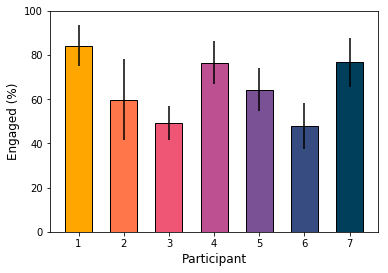

In [9]:
# Engagement by Participant Graph
# StDev Between Sessions as Error Bars

plt.rcParams["figure.figsize"] = [5.5,3.9]

fig, ax = plt.subplots()
index = np.arange(len(data))
bar_width = 0.6
#gradient = ['#CC004C', '#F37021','#FCB711','#0089D0','#6460AA','#7D7D7D']
gradient = []

gradient = ['#ffa600', '#ff764a', '#ef5675', '#bc5090', '#7a5195', '#374c80','#003f5c']
# gradient = ['#e41a1c', '#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628']
rects1 = ax.bar(index, engagement_record, bar_width, yerr=session_std, edgecolor='k', color=gradient)

ax.set_xlabel('Participant', fontsize=12)
ax.set_ylabel('Engaged (%)', fontsize=12)
plt.ylim(0, 100)

ax.set_xticks(index)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7'))
fig.tight_layout()

plt.show()
fig.savefig('bar_graph.eps', format='eps', dpi=1000)

[0.97327766 0.92584009 0.77255363 0.8355688  0.73114884        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
[0.51723072 0.84048027 0.69946524 0.59264579 0.63526469 0.95555556
 0.81716209 0.35071612        nan        nan        nan        nan
        nan        nan        nan]
[0.5403794  0.58834434 0.4687054  0.53101737 0.3640436         nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
[0.91849878 0.83959262 0.91250734 0.63533185 0.70023791 0.67185528
 0.69427216 0.72785526 0.79254079        nan        nan        nan
        nan        nan        nan]
[0.76088475 0.60963999 0.72031195 0.55613037 0.504228          nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
[0.38623384 0.44207639 0.63421829 0.37011033        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        na

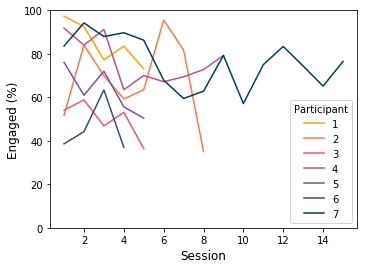

In [10]:
# Engagement By Session
plt.rcParams["figure.figsize"] = [5.5,4]
fig, ax = plt.subplots()

longest = 0
for i in session_record:
    longest = max(longest, len(i))

index = list(range(1, longest+1))
for p,i in enumerate(session_record):
    need = np.empty(longest-len(i))
    need[:] = np.nan
    new = np.hstack((np.array(i), need))
    print(new)
    plt.plot(index, new*100, label=str(part[p]), color=gradient[p])
    
ax.set_xlabel('Session', fontsize=12)
ax.set_ylabel('Engaged (%)', fontsize=12)
plt.ylim(0, 100)

plt.legend(loc='best', title='Participant')
fig.savefig('session_line.eps', format='eps', dpi=1000)

In [ ]:
# Continuous Engagement and Disengagement

cont_en = []
cont_dis = []

cont_en_std = []
cont_dis_std = []

for i, d in enumerate(data):
    curr = 0
    last = d.loc[0, 'engagement']
    last_sess = d.loc[0, 'session_num']
    
    track_en = []
    track_dis = []
    
    for j,r in d.iterrows():
        if (last != r['engagement']) or (last_sess != r['session_num']):
            #record this
            if (last == 0):
                track_dis.append(curr)
            else:
                track_en.append(curr)
            
            curr = 0
            last = r['engagement']
            last_sess = r['session_num']
            
        curr+= 1
    
    # grab last one 
    if (last == 0):
        track_dis.append(curr)
    else:
        track_en.append(curr)
    
    # Median Continuous 
    en = (np.median(track_en)/30)   
    print(round(en, 3))
    cont_en.append(en)
    
    dis = (np.median(track_dis)/30)
    print(round(dis, 3))
    cont_dis.append(dis)
    
    # St Dev Continuous 
    en_std = (np.std(track_en)/30)
    print(round(en_std, 3))
    cont_en_std.append(en_std)
    
    dis_std = (np.std(track_dis)/30)
    print(round(dis_std, 3))
    cont_dis_std.append(dis_std)

print(np.mean(cont_en))
print(np.mean(cont_dis))
print(np.mean(cont_en_std))
print(np.mean(cont_dis_std))

In [ ]:
# Continuous Engagement Graph

plt.rcParams["figure.figsize"] = [7,4]

fig, ax = plt.subplots()

index = np.arange(len(part))
bar_width = 0.35

rects1 = ax.bar(index, cont_en, bar_width, label='engaged')
rects2 = ax.bar(index+bar_width, cont_dis, bar_width, label='disengaged')

ax.set_xlabel('Participant')
ax.set_ylabel('Continuous Time (Seconds)')
ax.set_title('Median Continuous Engagement and Disengagement')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('5', '7', '8', '9'))
ax.legend()
fig.tight_layout()

plt.show()

In [ ]:
# Robot Talking / Not Talking
# During Games / Not During Games
# Open Face Success / Open Face Failure 


plt.rcParams["figure.figsize"] = [10,6]

fig, ax = plt.subplots()

index = np.arange(3)
bar_width = 0.35

rects1 = ax.bar(index, [78.341, 60.356, 65.048], bar_width, color="w", edgecolor="k", label='yes')
rects2 = ax.bar(index+bar_width, [27.544, 22.245, 50.580], bar_width, color="k", label='no')

threshold = 53.137
ax.plot([0, 2], [threshold, threshold], "k--")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 100)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('', '', ''))
ax.legend(prop={'size': 20})

fig.tight_layout()

plt.show()

In [14]:
data7['session_num'].unique()

array([ 5.,  6.,  7.,  8., 16., 17., 18., 29.])

In [15]:
temp = data7[data7['session_num']==29]
temp['engagement'].sum()/len(temp)

0.35071612192434815

In [ ]:
[0.51723072 0.84048027 0.69946524 0.59264579 0.63526469 0.95555556
 0.81716209 0.35071612        nan        nan        nan        nan
        nan        nan        nan]

In [19]:
engaged = all_data[all_data['engagement']==1]
disengaged = all_data[all_data['engagement']==0]
import scipy 

key_features = [
'op_num_people',
'of_pose_distance',
'of_gaze_distance',
'of_confidence',
'ros_mistakes_session',
'ros_ts_robot_talked']

for kf in key_features:
    a = np.var(engaged[kf]) 
    b = np.var(disengaged[kf])
    print(a,b)
    F = np.var(engaged[kf]) / np.var(disengaged[kf])
    df1 = len(engaged[kf]) - 1
    df2 = len(disengaged[kf]) - 1
    print(F, df1, df2)
    p_value = scipy.stats.f.cdf(F, df1, df2)
    print(p_value)

0.15362448405518855 0.37079704218824366
0.414308817429017 82154 43550
0.0
339831.1146511701 2262965.0771947317
0.1501707286938954 82154 43550
0.0
135924.4758181529 653584.4687110706
0.20796772617043457 82154 43550
0.0
0.11597950677424128 0.19526352552072118
0.5939640107641795 82154 43550
0.0
25.685665983428915 70.14495004657329
0.3661798314258506 82154 43550
0.0
1473.771676788015 4874.270475070475
0.3023573854437584 82154 43550
0.0
